In [0]:
# Databricks Notebook: 4_Data_Visualization
# This notebook demonstrates how to visualize key metrics from the e-commerce sales data.

from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, desc
import matplotlib.pyplot as plt
from pyspark.sql.functions import count

# Initialize Spark session (Databricks automatically provides 'spark')
spark = SparkSession.builder.appName("DataVisualization").getOrCreate()

# Read the cleaned data from the Delta table
df = spark.sql("SELECT * FROM ecommerce_sales_cleaned")
display(df) 

order_id,sale_date,price,product_id,category,year
O1001,2023-01-15,120.5,P101,Electronics,2023
O1001,2023-01-15,45.0,P102,Books,2023
O1001,2023-01-15,85.99,P103,Clothing,2023
O1002,2023-01-16,50.0,P102,Books,2023
O1002,2023-01-16,110.0,P104,Home,2023
O1002,2023-01-16,99.99,P105,Beauty,2023
O1002,2023-01-16,210.0,P101,Electronics,2023
O1003,2023-01-17,75.0,P103,Clothing,2023
O1003,2023-01-17,60.0,P106,Sports,2023
O1004,2023-01-18,120.0,P101,Electronics,2023


year,total_revenue
2023,4895.899982452393


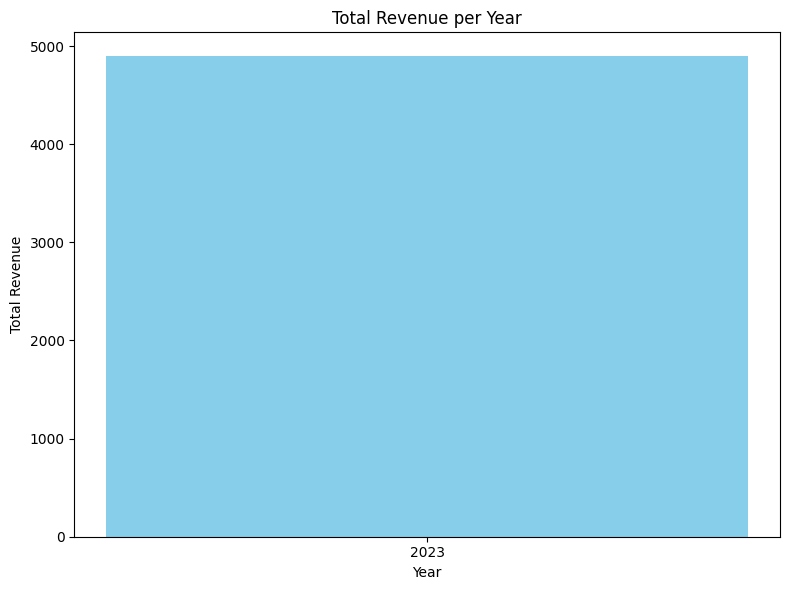

In [0]:
# --- Revenue per Year Visualization ---

# Aggregate revenue per year
revenue_df = df.groupBy("year").agg(sum("price").alias("total_revenue")).orderBy("year")
display(revenue_df)  # You can also use Databricks charting (click the chart icon)

# Convert to Pandas DataFrame for Matplotlib visualization
pandas_revenue = revenue_df.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(pandas_revenue['year'].astype(str), pandas_revenue['total_revenue'], color='skyblue')
plt.title("Total Revenue per Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

product_id,total_revenue
P109,1250.0
P101,942.0
P105,499.94998931884766
P103,468.9499931335449
P104,395.75
P106,360.0
P110,325.0
P108,278.75
P102,265.5
P107,110.0


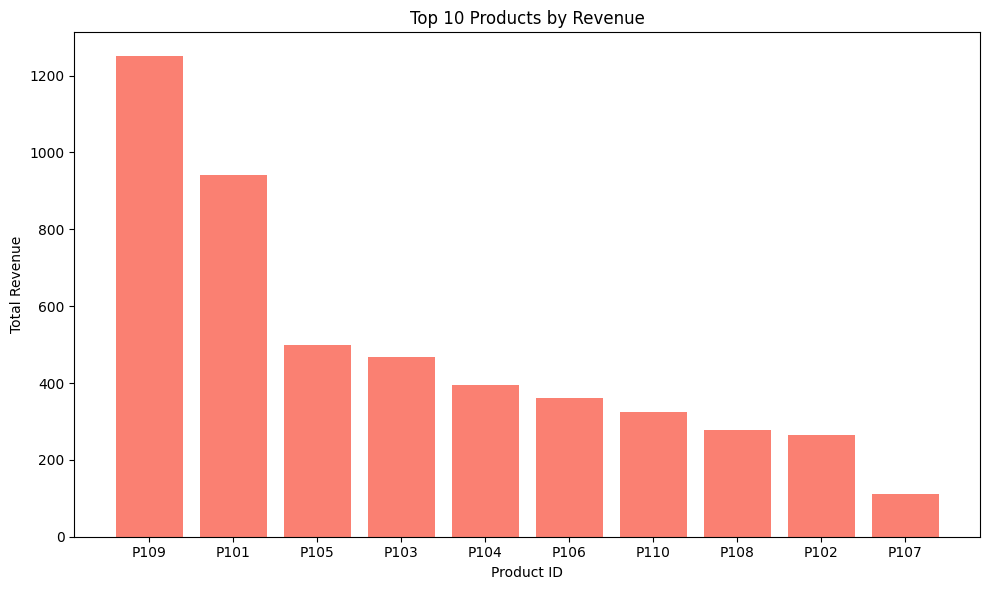

In [0]:
# --- Top 10 Products by Revenue Visualization ---

# Compute Top 10 products by revenue
top_products_df = df.groupBy("product_id").agg(sum("price").alias("total_revenue")).orderBy(desc("total_revenue")).limit(10)
display(top_products_df)  # Again, you can click on the built-in chart options in Databricks

# Convert to Pandas DataFrame for Matplotlib visualization
pandas_top_products = top_products_df.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pandas_top_products['product_id'], pandas_top_products['total_revenue'], color='salmon')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

category,order_count
Sports,5
Garden,5
Beauty,5
Toys,5
Books,6
Electronics,7
Home,10
Clothing,11


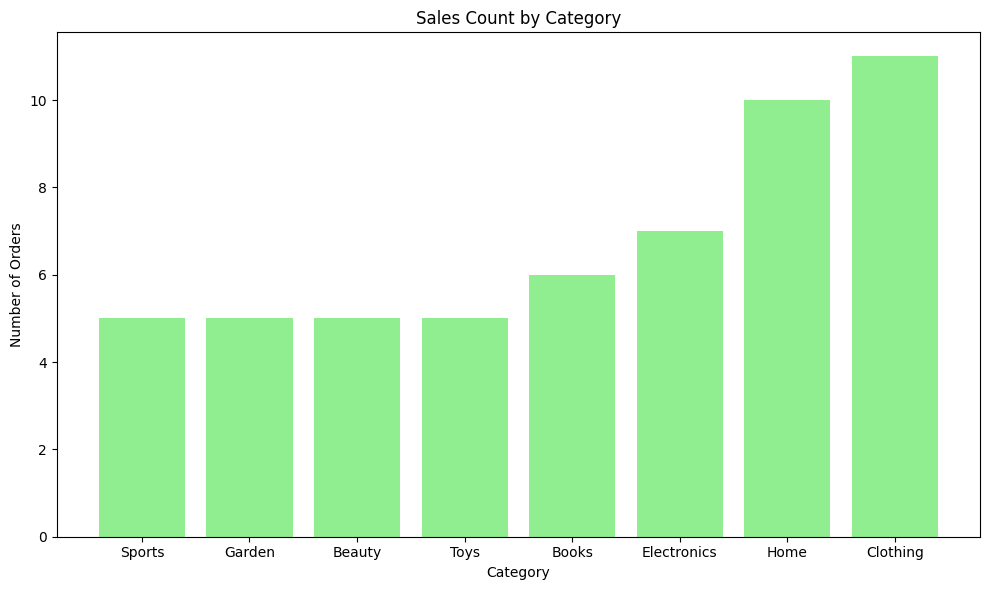

In [0]:
# --- Sales Count by Category Visualization ---

# Aggregate order count per category
category_count_df = df.groupBy("category").agg(count("order_id").alias("order_count")).orderBy("order_count")
display(category_count_df)

# Convert to Pandas DataFrame for Matplotlib visualization
pandas_category_count = category_count_df.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pandas_category_count['category'], pandas_category_count['order_count'], color='lightgreen')
plt.title("Sales Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()